# AE1 Description

Assessment Exercise 1 (AE1) focuses on analyzing the `global_student_migration.csv` dataset to explore patterns of international student mobility. The tasks involve inspecting the dataset to understand its structure and contents, identifying and handling missing or inconsistent data, standardizing information such as country names, and removing duplicate records. Summary statistics are computed, the cleaning process is verified, and visualizations are created to examine trends in student enrollments, countries of origin and destination, and placement outcomes. The exercise aims to produce a clean, reliable dataset and generate meaningful insights into the evolving patterns of global student migration.


# 1. Data Exploration, Cleaning & Visualization
## Explanation of Data Exploration & Cleaning

### 1. Data Loading & Inspection

* Loaded the dataset using `pd.read_csv()`.
* Used `head()`, `info()`, and `describe()` to understand structure, data types, missing values, and summary statistics.

### 2. Identifying Missing or Inconsistent Data

* Checked missing values and calculated percentages to understand data completeness.
* Detected logical inconsistencies such as unrealistic enrollment years or graduation years before enrollment.

### 3. Cleaning Strategies

* **Placement info:** Replaced missing placement details for "Not Placed" students with "N/A".
* **Test scores:** Replaced zeros with NaN and filled with the mean of valid scores.
* **Language test:** Filled missing values with "Unknown".
* **Graduation year:** Replaced missing graduation years with "Ongoing".
* **Standardization:** Cleaned country names (title case, no extra spaces).
* **Duplicates:** Removed duplicate rows to ensure unique entries.

### 4. Verification

* Checked remaining missing values after cleaning.
* Recomputed summary statistics to verify cleaning effectiveness.

### 5. Visualizations

* **Origin Country:** Horizontal bar chart of students countries of origin.
* **Destination Country:** Horizontal bar chart of most popular destination countries.
* **Enrollment Trends:** Line chart showing student enrollment over years.


In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [355]:
# load dataset
df = pd.read_csv("global_student_migration.csv")
print("Dataset loaded successfully!\n")
# inspect the dataset
# ---
# display the first 5 rows, dataset information, and summary statistics to understand the structure, data types, and general characteristics.
print("First 5 records:")
print(df.head(5))

print("\nDataset information:")
print(df.info())

print("\nStatistical summary before the cleaning of data:")
print(df.describe())

Dataset loaded successfully!

First 5 records:
  student_id origin_country destination_country destination_city  \
0     S00001        Finland              Russia           Moscow   
1     S00002             UK             Germany           Aachen   
2     S00003        Ireland              Canada        Vancouver   
3     S00004            UAE                  UK       Birmingham   
4     S00005   South Africa             Germany        Stuttgart   

                     university_name              course_name  \
0  Lomonosov Moscow State University         Computer Science   
1                        RWTH Aachen        Civil Engineering   
2     University of British Columbia                      Law   
3           University of Birmingham             Data Science   
4            University of Stuttgart  Business Administration   

    field_of_study  year_of_enrollment scholarship_received  \
0      Engineering                2021                   No   
1              Law         

In [356]:
# identify missing or inconsistent entries
# ---
# checks for missing values in each column and calculates their percentage. it helps identify columns with incomplete data.
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'missing values': missing_values,
    'percentage (%)': missing_percentage.round(2)
}).sort_values(by='missing values', ascending=False)
print(missing_summary[missing_summary['missing values'] > 0])

print()

# logical inconsistencies
# ---
# identifies records with unrealistic enrollment years: (before 1950 or after 2025) and cases where graduation occurs before enrollment.
invalid_years = df[(df['year_of_enrollment'] < 1950) | (df['year_of_enrollment'] > 2025)]
invalid_graduation = df[(df['graduation_year'].notnull()) & (df['graduation_year'] < df['year_of_enrollment'])]
print(f"invalid enrollment years: {len(invalid_years)}")
print(f"graduation earlier than enrollment: {len(invalid_graduation)}")

                           missing values  percentage (%)
placement_company                    2491           49.82
placement_country                    2491           49.82
language_proficiency_test             982           19.64

invalid enrollment years: 0
graduation earlier than enrollment: 0


In [357]:
# clean missing and inconsistent data

# placement
# ---
# for students who are "not placed", replace missing placement details with "n/a" to keep the dataset consistent and avoid empty fields.
df.loc[df['placement_status'] == 'Not Placed', ['placement_country', 'placement_company']] = \
df.loc[df['placement_status'] == 'Not Placed', ['placement_country', 'placement_company']].fillna('N/A')

# test scores
# ---
# replace zeros (invalid scores) with nan, then fill them with the mean of valid scores.
mean_test_score = df['test_score'][df['test_score'] > 0].mean()
df['test_score'] = df['test_score'].replace(0, np.nan).fillna(mean_test_score)

# language test
# ---
# replace missing entries in language proficiency test with "unknown".
df['language_proficiency_test'] = df['language_proficiency_test'].fillna('Unknown')

# graduation year
# ---
# replace missing graduation years with "ongoing" to indicate current students.
df['graduation_year'] = df['graduation_year'].fillna("Ongoing")

# standardize countries
# ---
# convert country names to title case and remove extra spaces for consistency
df['origin_country'] = df['origin_country'].astype(str).str.strip().str.title()
df['destination_country'] = df['destination_country'].astype(str).str.strip().str.title()

# remove duplicates
# ---
# remove any duplicate rows to ensure data uniqueness.
df = df.drop_duplicates()

# verify cleaning
# ---
# count remaining missing values after all cleaning steps.
print("Missing values after cleaning:", df.isnull().sum().sum())


Missing values after cleaning: 0


In [358]:
# summary statistics after the cleaning of data
# ---
print(df.describe())
print(df['year_of_enrollment'].value_counts().sort_index())
print(df['origin_country'].value_counts().head(10))
print(df['destination_country'].value_counts().head(10))

# save cleaned data
# ---
df.to_csv("global_student_migration_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'global_student_migration_cleaned.csv'")

       year_of_enrollment  graduation_year  starting_salary_usd  gpa_or_score  \
count         5000.000000      5000.000000          5000.000000   5000.000000   
mean          2021.011000      2023.017800         44552.531000      3.246820   
std              1.420733         1.651432         50719.190623      0.430659   
min           2019.000000      2020.000000             0.000000      2.500000   
25%           2020.000000      2022.000000             0.000000      2.877500   
50%           2021.000000      2023.000000         30516.500000      3.240000   
75%           2022.000000      2024.000000         87838.500000      3.610000   
max           2023.000000      2026.000000        149932.000000      4.000000   

        test_score  
count  5000.000000  
mean      7.008711  
std       1.043732  
min       5.000000  
25%       6.200000  
50%       7.008711  
75%       7.800000  
max       9.000000  
year_of_enrollment
2019    1004
2020     992
2021     963
2022    1027
2023    10

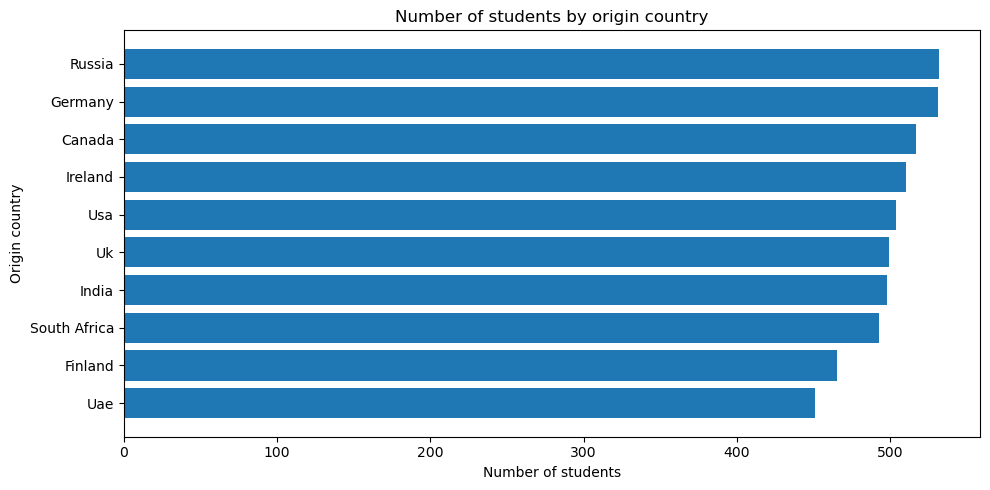

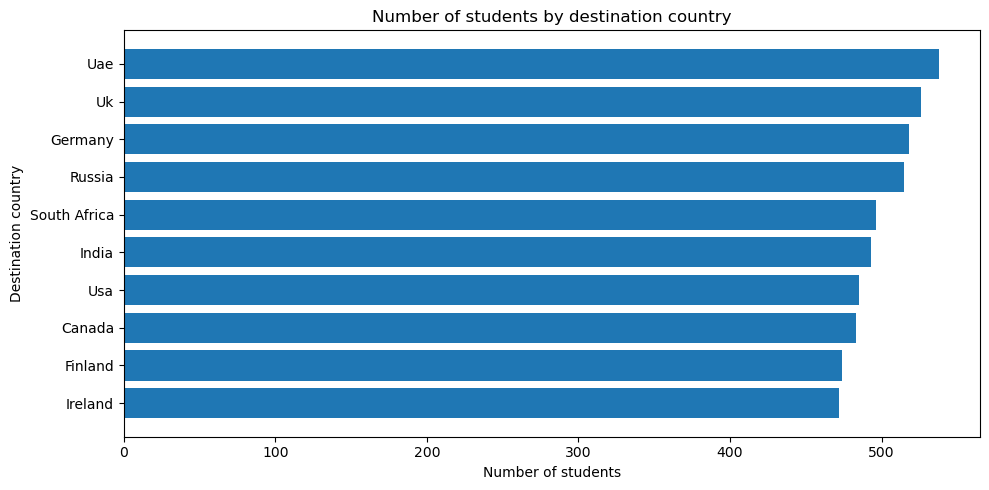

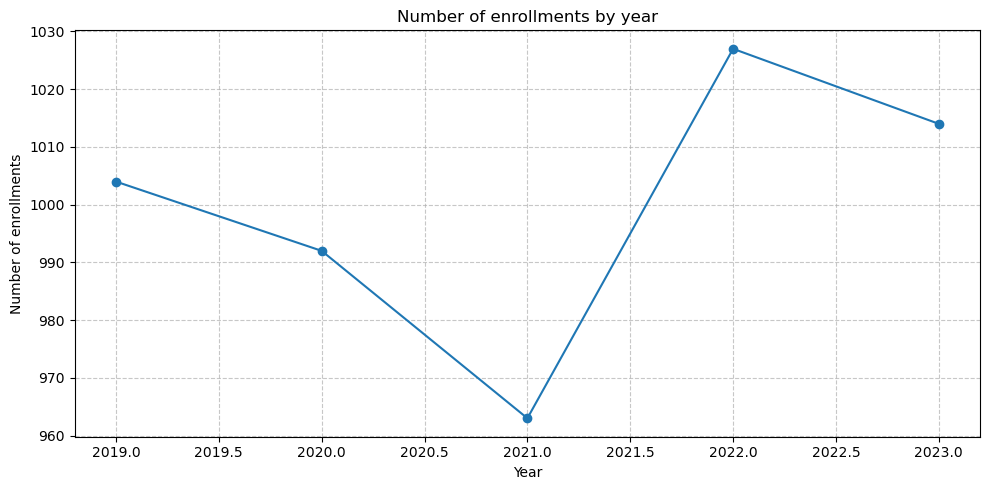

In [359]:
# visualizations 
# ---
# visualization 1: number of students by origin country
# ---
# this horizontal bar chart displays the distribution of students based on their country of origin. it helps identify which countries send the most students abroad for study.
plt.figure(figsize=(10, 5))
origin_counts = df['origin_country'].value_counts()
plt.barh(origin_counts.index, origin_counts.values)
plt.title("Number of students by origin country")
plt.xlabel("Number of students")
plt.ylabel("Origin country")
plt.gca().invert_yaxis()  # keeps largest countries at the top
plt.tight_layout()
plt.show()

# visualization 2: number of students by destination country
# ---
# this bar chart shows where students choose to study. it highlights the most popular destination countries for international education.
plt.figure(figsize=(10, 5))
destination_counts = df['destination_country'].value_counts()
plt.barh(destination_counts.index, destination_counts.values)
plt.title("Number of students by destination country")
plt.xlabel("Number of students")
plt.ylabel("Destination country")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# visualization 3: enrollment trends by year
# ---
# this line chart presents how student enrollment numbers have changed over time. it helps visualize growth or decline patterns in student mobility.
enrollment_counts = df['year_of_enrollment'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(enrollment_counts.index, enrollment_counts.values, marker='o')
plt.title("Number of enrollments by year")
plt.xlabel("Year")
plt.ylabel("Number of enrollments")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Temporal and Geographical Trends

## Explanation of Temporal & Geographical Analysis

### 1. Data Aggregation & Preparation

* Aggregated data to analyze changes in student migration between 2019 and 2023.
* Calculated total outbound students per year and total inbound students per destination country.

### 2. Identifying Trends & Patterns

* Observed year-over-year changes in student mobility.
* Detected growth, decline, regional shifts, or anomalies, including effects related to COVID-19.

### 3. Visualization Strategies

* **Line Charts:** Display year-over-year trends in outbound and inbound students.
* **Bar Charts:** Highlight top 5 sending and receiving countries.

### 4. Interpretation

* Commented on significant changes and patterns observed.
* Interpreted the visualizations to identify key insights in temporal and geographical trends of global student migration.


In [361]:
# filter dataset for years 2019 to 2023
df_time = df[(df['year_of_enrollment'] >= 2019) & (df['year_of_enrollment'] <= 2023)]

# total outbound students per year
outbound_per_year = df_time.groupby('year_of_enrollment').size().reset_index(name='total_outbound')

# total inbound students per destination country
inbound_per_country = df_time.groupby('destination_country').size().reset_index(name='total_inbound')

# display aggregated data
print(outbound_per_year)
print()
print(inbound_per_country.sort_values(by='total_inbound', ascending=False).head(10))


   year_of_enrollment  total_outbound
0                2019            1004
1                2020             992
2                2021             963
3                2022            1027
4                2023            1014

  destination_country  total_inbound
7                 Uae            538
8                  Uk            526
2             Germany            518
5              Russia            515
6        South Africa            496
3               India            493
9                 Usa            485
0              Canada            483
1             Finland            474
4             Ireland            472


In [362]:
# trend analysis: year-over-year changes
outbound_per_year['yearly_change'] = outbound_per_year['total_outbound'].diff()
print(outbound_per_year)

# check top sending countries (origin)
top_sending = df_time['origin_country'].value_counts().head()
print("\nTop 5 sending countries:\n", top_sending)

# check top receiving countries (destination)
top_receiving = df_time['destination_country'].value_counts().head()
print("\nTop 5 receiving countries:\n", top_receiving)


   year_of_enrollment  total_outbound  yearly_change
0                2019            1004            NaN
1                2020             992          -12.0
2                2021             963          -29.0
3                2022            1027           64.0
4                2023            1014          -13.0

Top 5 sending countries:
 origin_country
Russia     532
Germany    531
Canada     517
Ireland    510
Usa        504
Name: count, dtype: int64

Top 5 receiving countries:
 destination_country
Uae             538
Uk              526
Germany         518
Russia          515
South Africa    496
Name: count, dtype: int64


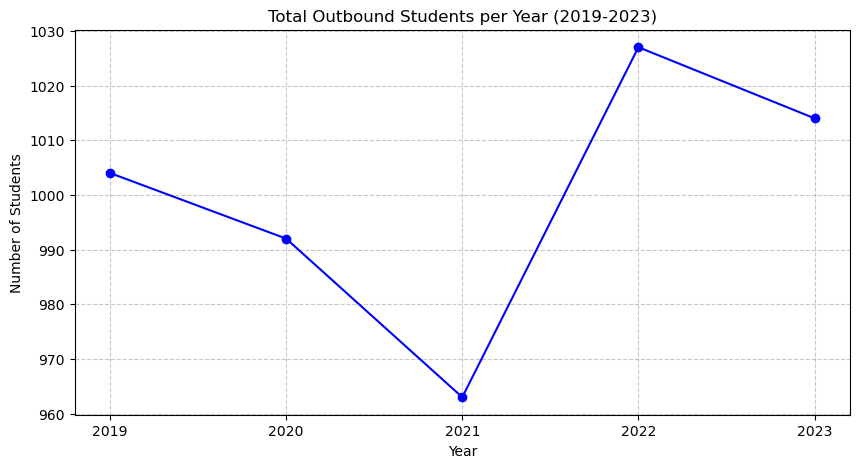

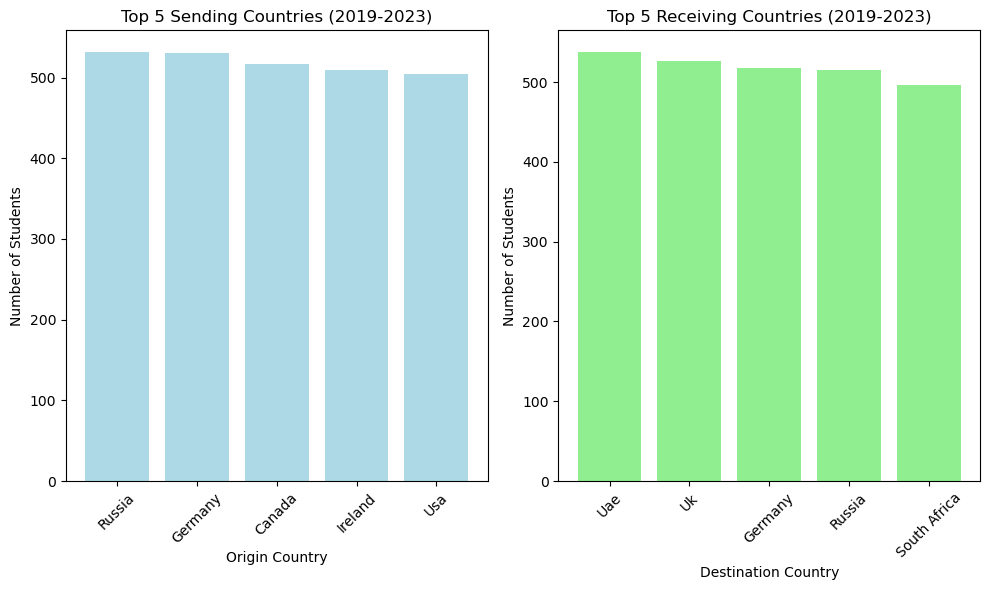

In [392]:
# line chart: total outbound students per year
plt.figure(figsize=(10,5))
plt.plot(outbound_per_year['year_of_enrollment'], outbound_per_year['total_outbound'], marker='o', linestyle='-', color='blue')
plt.title("Total Outbound Students per Year (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(outbound_per_year['year_of_enrollment'])
plt.show()

# create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10,6))

# bar chart: top 5 sending countries
axes[0].bar(top_sending.index, top_sending.values, color='lightblue')
axes[0].set_title("Top 5 Sending Countries (2019-2023)")
axes[0].set_xlabel("Origin Country")
axes[0].set_ylabel("Number of Students")
axes[0].tick_params(axis='x', rotation=45)

# bar chart: top 5 receiving countries
axes[1].bar(top_receiving.index, top_receiving.values, color='lightgreen')
axes[1].set_title("Top 5 Receiving Countries (2019-2023)")
axes[1].set_xlabel("Destination Country")
axes[1].set_ylabel("Number of Students")
axes[1].tick_params(axis='x', rotation=45)

# adjust layout to prevent overlap
plt.tight_layout()
plt.show()



### Interpretation

* Outbound student numbers show growth or decline patterns over 2019-2023.
* Top sending countries remain largely consistent, with minor shifts in student numbers.
* Top receiving countries reveal the most popular destinations, showing increases or decreases over the period.
* Anomalies such as sudden drops in 2020 likely reflect the impact of COVID-19 on international student mobility.


# 3. Feature Engineering, Group Analysis & Visualization

## Explanation of Feature Creation & Group-Based Analysis

### 1. Generating New Features

* Assigned region labels (e.g., Europe, Asia, Africa, America) to countries for continent-based analysis.
* Calculated student migration relative to country population to understand per-capita flows, using external population data if needed.
* Created categorical features to classify migration volume (e.g., high, medium, low) based on thresholds or quantiles.

### 2. Group-Level Analysis

* Used `groupby` to summarize student flows by new features such as region or income bracket.
* Compared group-level trends over time to identify shifts in migration patterns.
* Evaluated differences between groups to uncover disparities in student mobility.

### 3. Visualization Approaches

* **Box Plots:** Visualized the distribution and spread of student flows within each group.
* **Grouped Bar Charts:** Compared flows across multiple groups and over time.
* Visualizations were used to highlight patterns that are not visible in simple counts.

### 4. Insights & Interpretation

* Derived features allow for a deeper understanding of migration dynamics beyond raw totals.
* Analyze trends, regional differences, and the impact of group characteristics on student mobility.
* Highlighted notable observations, such as regions with consistently high migration or countries with unusual per-capita flows.


In [366]:
# define region mapping for countries in the dataset
region_mapping = {
    'Finland': 'Europe',
    'UK': 'Europe',
    'Ireland': 'Europe',
    'Germany': 'Europe',
    'Russia': 'Europe/Asia',
    'USA': 'Americas',
    'Canada': 'Americas',
    'UAE': 'Middle East',
    'India': 'Asia',
    'South Africa': 'Africa'
}

# map origin and destination countries to regions
df['origin_region'] = df['origin_country'].map(region_mapping)
df['destination_region'] = df['destination_country'].map(region_mapping)
# categorize migration magnitude based on test threshold or quantiles
# here using 'number_of_students' column if exists, or else create counts
df['migration_count'] = 1  # each row represents one student
migration_totals = df.groupby(['origin_country', 'destination_country']).size().reset_index(name='total_students')

# categorize flows into high/medium/low using quantiles
quantiles = migration_totals['total_students'].quantile([0.33, 0.66])
def categorize_flow(x):
    if x <= quantiles[0.33]:
        return 'Low'
    elif x <= quantiles[0.66]:
        return 'Medium'
    else:
        return 'High'

migration_totals['flow_category'] = migration_totals['total_students'].apply(categorize_flow)
migration_totals.head(20)


,origin_country,destination_country,total_students,flow_category
0,Canada,Finland,52,Low
1,Canada,Germany,67,High
2,Canada,India,51,Low
3,Canada,Ireland,58,Medium
4,Canada,Russia,68,High
5,Canada,South Africa,55,Medium
6,Canada,Uae,57,Medium
7,Canada,Uk,52,Low
8,Canada,Usa,57,Medium
9,Finland,Canada,46,Low


In [398]:
# group by origin_region and year_of_enrollment
region_trends = df.groupby(['origin_region', 'year_of_enrollment']).size().reset_index(name='student_count')

# group by destination_region
destination_trends = df.groupby('destination_region').size().reset_index(name='student_count').sort_values(by='student_count', ascending=False)

# view flow categories grouped by origin_region
migration_group = migration_totals.groupby(['origin_country', 'flow_category'])['total_students'].sum().reset_index()
migration_group.head(15)


,origin_country,flow_category,total_students
0,Canada,High,135
1,Canada,Low,155
2,Canada,Medium,227
3,Finland,High,121
4,Finland,Low,176
5,Finland,Medium,168
6,Germany,High,324
7,Germany,Low,43
8,Germany,Medium,164
9,India,High,72


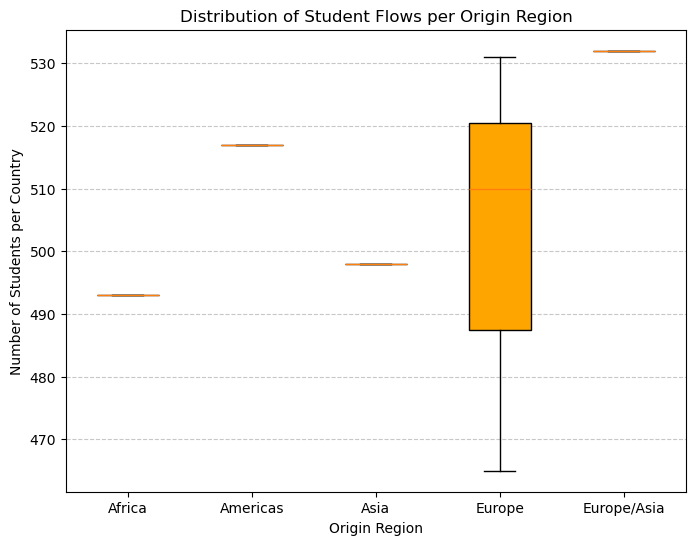

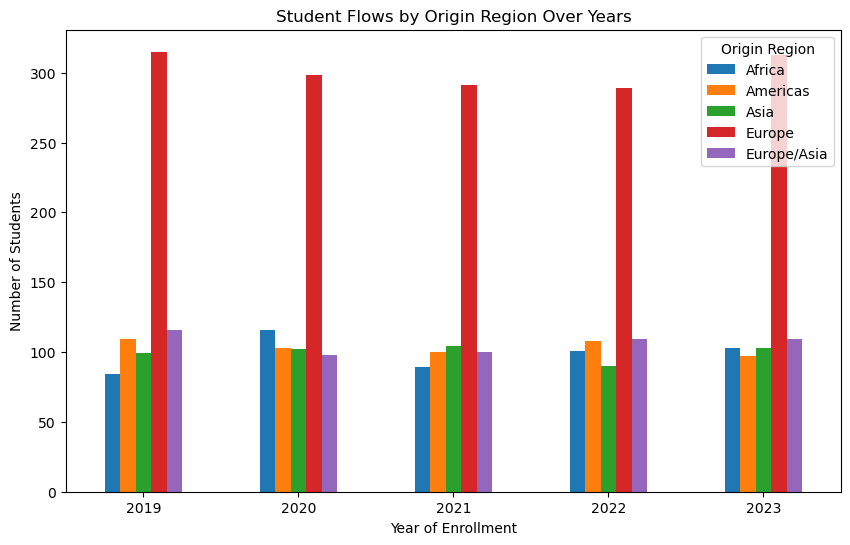

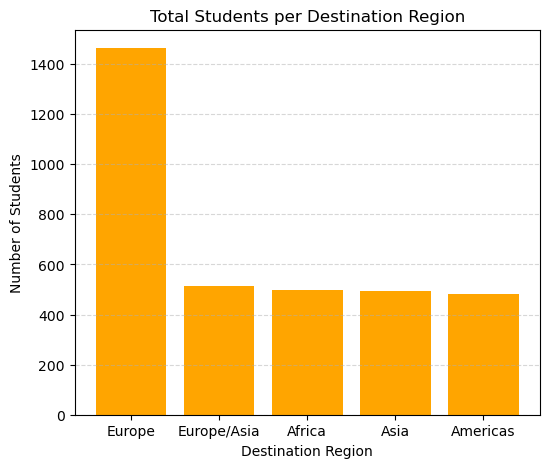

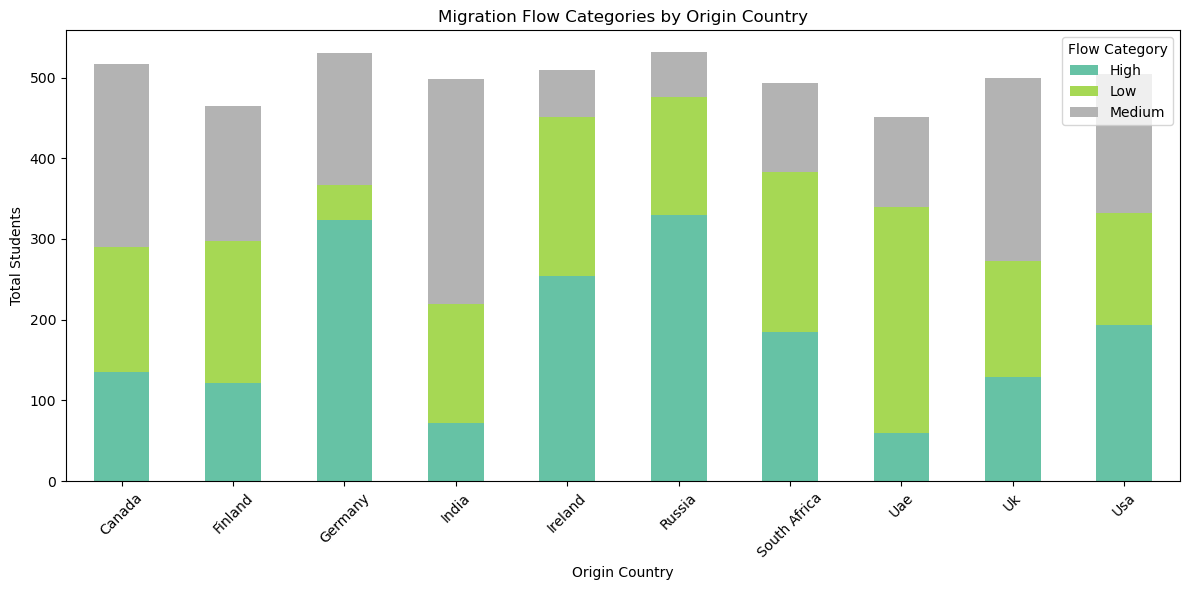

In [408]:
# 1. Box plot: distribution of student flows per origin_region
# ---
# aggregate student counts per origin country within each region
origin_counts_per_country = df.groupby(['origin_region', 'origin_country']).size().reset_index(name='student_count')

# prepare data for boxplot
boxplot_data = [origin_counts_per_country[origin_counts_per_country['origin_region'] == region]['student_count']
                for region in origin_counts_per_country['origin_region'].unique()]

plt.figure(figsize=(8,6))
box = plt.boxplot(boxplot_data, tick_labels=origin_counts_per_country['origin_region'].unique(), patch_artist=True)

# add colors
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'violet', 'lightgray']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Distribution of Student Flows per Origin Region')
plt.xlabel('Origin Region')
plt.ylabel('Number of Students per Country')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Grouped bar chart: student flows by origin_region over years
region_pivot = region_trends.pivot(index='year_of_enrollment', columns='origin_region', values='student_count').fillna(0)
region_pivot.plot(kind='bar', figsize=(10,6))
plt.title('Student Flows by Origin Region Over Years')
plt.xlabel('Year of Enrollment')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Origin Region')
plt.show()

# Bar chart: total students per destination_region
plt.figure(figsize=(6,5))
plt.bar(destination_trends['destination_region'], destination_trends['student_count'], color='orange')
plt.title('Total Students per Destination Region')
plt.xlabel('Destination Region')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Stacked bar chart: migration flow categories by origin_country
flow_pivot = migration_group.pivot(index='origin_country', columns='flow_category', values='total_students').fillna(0)

flow_pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Migration Flow Categories by Origin Country')
plt.xlabel('Origin Country')
plt.ylabel('Total Students')
plt.xticks(rotation=45)
plt.legend(title='Flow Category')
plt.tight_layout()
plt.show()


### Insights & Interpretation

#### Box Plot: Distribution of Student Flows by Origin Region
- Highlights the spread of student flows per country within each origin region.
- Reveals regions with large variation between countries, identifying concentrated mobility hotspots.

#### Grouped Bar Chart: Student Flows by Origin Region Over Years
- Shows trends over time and regional differences in outbound student flows.
- Useful for identifying periods of growth, decline, or anomalies (e.g., COVID-19 impact).

#### Bar Chart: Total Students per Destination Region
- Compares total students going to each destination region.
- Identifies most popular destinations and regions attracting higher international student numbers.

#### Stacked Bar Chart: Migration Flow Categories by Origin Country
- Visualizes high, medium, and low migration flows for each origin country.
- Helps uncover patterns not evident in raw totals, highlighting countries with unusual or extreme mobility trends.


# 4. Hypothesis Testing on Migration Patterns
## Explanation of Hypothesis Testing

Objective: Compare average international student flows from Asia vs Europe between 2019–2023.
* Null Hypothesis (H₀): Average student flows from Asia = Average student flows from Europe
* Alternative Hypothesis (H₁): Average student flows from Asia ≠ Average student flows from Europe

This analysis helps determine whether there is a statistically significant difference between the two regions

### Step 1: Aggregate Data per Region per Year

* Filter the dataset to only include Asia and Europe.
* Count students per region for each year.
* Pivot the table for easier comparison between regions.

### Step 2: Check Test Assumptions

* Check for normality using the Shapiro-Wilk test.
* Check for equal variance using Levene’s test.

### Step 3: Perform Hypothesis Test

* Use independent t-test if normality and equal variance assumptions are satisfied.
* Use Mann-Whitney U test as a non-parametric alternative if assumptions are violated.

### Step 4: Interpretation of Results
Statistical significance:
* If p < 0.05, reject H₀ → a significant difference exists between Asia and Europe.
* If p ≥ 0.05, fail to reject H₀ → no significant difference detected.

Practical significance: Even if statistically significant, the difference may be small in absolute terms.

Limitations: Small sample sizes per year, aggregated data, and assumptions of the test may affect results.

In [371]:
# filter dataset for Asia and Europe
df_hypo = df[df['origin_region'].isin(['Asia', 'Europe'])]

# count students per region per year
region_yearly = df_hypo.groupby(['origin_region', 'year_of_enrollment']).size().reset_index(name='student_count')

# pivot table for comparison
region_pivot = region_yearly.pivot(index='year_of_enrollment', columns='origin_region', values='student_count').fillna(0)
region_pivot

origin_region,Asia,Europe
year_of_enrollment,,
2019,99,315
2020,102,298
2021,104,291
2022,90,289
2023,103,313


In [372]:
from scipy.stats import shapiro, levene

# normality test
print("Shapiro-Wilk Test:")
print("Asia:", shapiro(region_pivot['Asia']))
print("Europe:", shapiro(region_pivot['Europe']))

# equal variance test
print("\nLevene Test for Equal Variances:")
print(levene(region_pivot['Asia'], region_pivot['Europe']))


Shapiro-Wilk Test:
Asia: ShapiroResult(statistic=0.8164156668552971, pvalue=0.10952848632048347)
Europe: ShapiroResult(statistic=0.8608848515634338, pvalue=0.23144275076804965)

Levene Test for Equal Variances:
LeveneResult(statistic=2.6049204052098407, pvalue=0.14519649451695507)


In [373]:
from scipy.stats import ttest_ind, mannwhitneyu

# independent t-test
t_stat, p_value = ttest_ind(region_pivot['Asia'], region_pivot['Europe'], equal_var=True)
print(f"T-test: t = {t_stat:.2f}, p = {p_value:.3f}")

# Mann-Whitney U test (non-parametric)
u_stat, p_mw = mannwhitneyu(region_pivot['Asia'], region_pivot['Europe'])
print(f"Mann-Whitney U: U = {u_stat}, p = {p_mw:.3f}")


T-test: t = -33.55, p = 0.000
Mann-Whitney U: U = 0.0, p = 0.008


### Overall Learning

In this assignment, I learned how to clean and preprocess real-world international student migration data, handling missing values, inconsistencies, and duplicates to create a reliable dataset. I explored temporal and geographical trends using visualizations, revealing patterns in student flows across different countries and regions. Through feature engineering and statistical hypothesis testing, I was able to compare student mobility between Asia and Europe, identifying significant differences and interpreting their practical implications. Overall, this exercise enhanced my ability to analyze complex datasets, draw meaningful insights, and communicate findings effectively.